In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


train_path = 'D:/CatractImagesMobileNet/cataract/CatractDataset/Training-dataset/'
valid_path = 'D:/CatractImagesMobileNet/cataract/CatractDataset/Test-Dataset/'

# add preprocessing layer to the front of VGG
mbnt = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [3]:
import xlsxwriter
workbook = xlsxwriter.Workbook('D:/CatractImagesMobileNet/cataract/files/MobileNetCatractImagesAnalysis.xlsx')
worksheet1 = workbook.add_worksheet()
row=0
col=0
imageCount=0
worksheet1.write(row, 0, str("Analysis of Image"))
worksheet1.write(row, 1, str("Actual Object"))
worksheet1.write(row, 2, str("Percentage for Detected Object"))
worksheet1.write(row, 3, str("Detected Object"))
import os

row=1
for path, currentDirectory, files in os.walk("D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset"):
    for file in files:
        print(os.path.join(path, file))
        imageCount=imageCount + 1
        worksheet1.write(row, 0, str("Image-" + str(imageCount)))
        row=row+1
        

D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_061.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_062.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_063.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_064.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_065.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_066.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_067.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_068.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_069.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_070.png
D:\CatractImagesMobileNet\cataract\CatractDataset\Test-Dataset\cataract\cataract_071.png
D:\CatractImagesMobil

In [4]:
imageCount

40

In [5]:
# don't train existing weights
for layer in mbnt.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of classes
folders = glob('D:/CatractImagesMobileNet/cataract/CatractDataset/Training-dataset/*')
print(len(folders))

2


In [7]:
# our layers - you can add more if you want
x = Flatten()(mbnt.output)
x = Dense(200, activation='relu')(x)
x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
#prediction = Dense(1, activation='sigmoid')(x)


In [8]:
# create a model object
model = Model(inputs=mbnt.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
  
training_set = train_datagen.flow_from_directory('D:/CatractImagesMobileNet/cataract/CatractDataset/Training-dataset/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/CatractImagesMobileNet/cataract/CatractDataset/Test-Dataset/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [12]:
import os
cats=[]
cat=[]
for path, currentDirectory, files in os.walk("D:\CatractImagesMobileNet\cataract\CatractDataset\Training-dataset"):
    for file in files:
        #print(os.path.join(path, file))
        #print(file)
        cats=path.split("\\")
        cats=cats[len(cats)-1]
        if cats not in cat:
            cat.append(cats)
            print(cats)
cat.sort()
print(cat)

#images,cls = next(test_set)



cataract
normal
['cataract', 'normal']


In [13]:
#plt.imshow(images[3])
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [14]:
len(test_set)

2

In [15]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
3/3 [==============================] - 19s 6s/step - loss: 2.1422 - accuracy: 0.6375 - val_loss: 8.5272 - val_accuracy: 0.6500
Epoch 2/20
3/3 [==============================] - 17s 6s/step - loss: 4.9833 - accuracy: 0.8000 - val_loss: 8.8650 - val_accuracy: 0.7250
Epoch 3/20
3/3 [==============================] - 17s 6s/step - loss: 6.9269 - accuracy: 0.7750 - val_loss: 2.8639 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 26s 9s/step - loss: 2.6082 - accuracy: 0.8750 - val_loss: 3.3831 - val_accuracy: 0.9000
Epoch 5/20
3/3 [==============================] - 24s 8s/step - loss: 3.3956 - accuracy: 0.8500 - val_loss: 1.5033 - val_accuracy: 0.9000
Epoch 6/20
3/3 [==============================] - 34s 11s/step - loss: 1.4969 - accuracy: 0.8875 - val_loss: 8.5129 - val_accuracy: 0.7250
Epoch 7/20
3/3 [==============================] - 30s 10s/step - loss: 1.9412 - accuracy: 0.9125 - val_loss: 2.3421 - val_accuracy: 0.9000
Epoch 8/20
3/3 [================

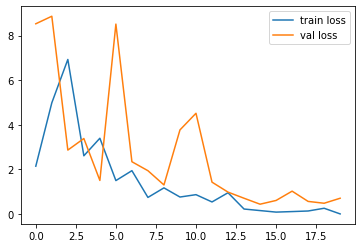

In [19]:
# loss
#import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

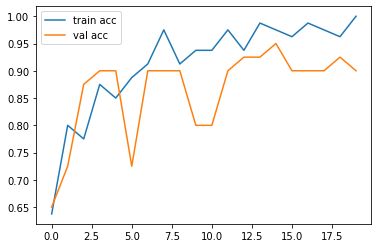

In [20]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [37]:
a, acc = model.evaluate(test_set)
print(acc)
print(a)

2/2 [==============================] - 1s 287ms/step - loss: 1.0410 - accuracy: 0.9000
0.8999999761581421
1.041049599647522


In [38]:
model.save("D:/CatractImagesMobileNet/cataract/Mobile114Model.h4")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:/CatractImagesMobileNet/cataract/Mobile114Model.h4\assets


In [21]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\CatractDataset\\Test-Dataset",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)
     

Found 40 images belonging to 2 classes.
[[1.0000000e+00 6.8171773e-14]
 [9.8119515e-01 1.8804921e-02]
 [1.0000000e+00 5.1756675e-08]
 [1.0000000e+00 2.2646173e-11]
 [1.4882896e-05 9.9998510e-01]
 [1.0000000e+00 7.8071577e-10]
 [1.0000000e+00 9.7352668e-11]
 [3.7264688e-06 9.9999630e-01]
 [6.1613217e-04 9.9938381e-01]
 [9.9999988e-01 1.6871778e-07]
 [1.0000000e+00 4.6403158e-15]
 [9.9996257e-01 3.7408867e-05]
 [3.1958236e-10 1.0000000e+00]
 [1.9860056e-06 9.9999797e-01]
 [1.0000000e+00 1.8282067e-09]
 [2.7334842e-30 1.0000000e+00]
 [9.9999988e-01 9.1882512e-08]
 [1.0000000e+00 2.8104920e-15]
 [2.1630369e-01 7.8369635e-01]
 [9.9999988e-01 9.6200260e-08]
 [2.3631794e-02 9.7636819e-01]
 [1.0000000e+00 3.6492480e-08]
 [7.1743226e-23 1.0000000e+00]
 [1.0000000e+00 1.5027228e-10]
 [2.1141313e-04 9.9978858e-01]
 [3.5999764e-12 1.0000000e+00]
 [9.9999952e-01 5.3606618e-07]
 [8.5400992e-28 1.0000000e+00]
 [1.2622866e-06 9.9999869e-01]
 [4.0372026e-18 1.0000000e+00]
 [1.0000000e+00 5.8255756e-09]

In [24]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\CatractDataset\\TestC",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)
     

Found 1 images belonging to 2 classes.
[[1.3467639e-19 1.0000000e+00]]


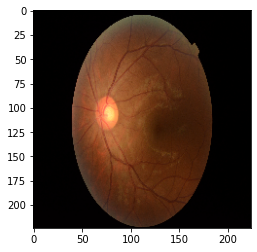

In [25]:
images,cls = next(test_set)
plt.imshow(images[0])

1 Actual: normal
File: cataract\cataract_061.png
1predicted: normal
[0. 1.]
[2.3513030411592695e-10, 1.0]
1 Actual: normal
File: cataract\cataract_062.png
0predicted: cataract
[0. 1.]
[1.0, 1.3782768743669878e-17]
1 Actual: normal
File: cataract\cataract_063.png
1predicted: normal
[0. 1.]
[8.489675976108835e-12, 1.0]
0 Actual: cataract
File: cataract\cataract_064.png
0predicted: cataract
[1. 0.]
[1.0, 1.0855814858157231e-10]
0 Actual: cataract
File: cataract\cataract_065.png
0predicted: cataract
[1. 0.]
[1.0, 9.090485586504826e-10]
0 Actual: cataract
File: cataract\cataract_066.png
1predicted: normal
[1. 0.]
[1.7081206783210734e-13, 1.0]
0 Actual: cataract
File: cataract\cataract_067.png
1predicted: normal
[1. 0.]
[6.351243420077424e-10, 1.0]
1 Actual: normal
File: cataract\cataract_068.png
0predicted: cataract
[0. 1.]
[1.0, 1.9556726016389803e-08]
1 Actual: normal
File: cataract\cataract_069.png
1predicted: normal
[0. 1.]
[0.0001455802412237972, 0.9998544454574585]
0 Actual: cataract


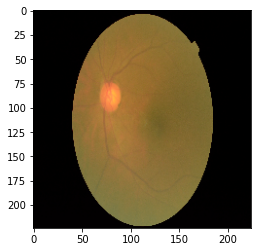

In [40]:
images,cls = next(test_set)
filename=test_set.filenames

#plt.imshow(images[0])
#print(cls[0])
#print(filename[0])
i=0
actual=[]
predicted=[]
for cl in cls:
    c=cl.tolist()
    max_value = max(c)
    max_index = c.index(max_value)
    print(str(max_index) + " Actual: " + cat[max_index])
    print("File: "  + filename[i])
    plt.imshow(images[i])
    actual.append(cat[max_index])
    
    pd=pred[i].tolist()
    m_value = max(pd)
    #print(max_value)
    m_index = pd.index(m_value)
    #print(max_index)
    print(str(m_index) + "predicted: " + cat[m_index])
    predicted.append(cat[m_index])
    print(cl)
    print(pd)
    plt.savefig('D:\\CatractImagesMobileNet\cataract\Predicted\Actual-' + str(cat[max_index]) + ' Predicted-' + str(cat[m_index])+ '-' + str(i) +'.png')
    i=i+1
    
#print(pd)
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()


[0. 1.]
cataract\cataract_062.png


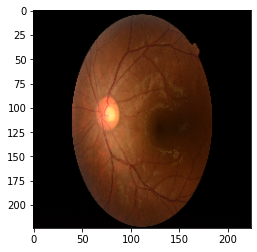

In [41]:
plt.imshow(images[1])
print(cls[1])
print(filename[1])


[0. 1.]
cataract\cataract_063.png


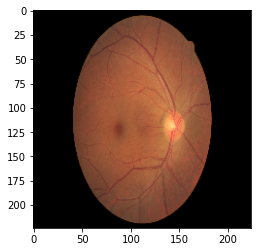

In [42]:
plt.imshow(images[2])
print(cls[2])
print(filename[2])

[1. 0.]
cataract\cataract_064.png


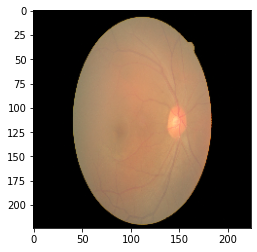

In [43]:
plt.imshow(images[3])
print(cls[3])
print(filename[3])

In [44]:
actual

['normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract']

In [45]:
predicted=[]
pre=pred.tolist()
for pd in pre:
    max_value = max(pd)
    print(pd)
    #print(max_value)
    max_index = pd.index(max_value)
    #print(max_index)
    print(str(max_index) + "predicted: " + cat[max_index])
    predicted.append(cat[max_index])

[2.3513030411592695e-10, 1.0]
1predicted: normal
[1.0, 1.3782768743669878e-17]
0predicted: cataract
[8.489675976108835e-12, 1.0]
1predicted: normal
[1.0, 1.0855814858157231e-10]
0predicted: cataract
[1.0, 9.090485586504826e-10]
0predicted: cataract
[1.7081206783210734e-13, 1.0]
1predicted: normal
[6.351243420077424e-10, 1.0]
1predicted: normal
[1.0, 1.9556726016389803e-08]
0predicted: cataract
[0.0001455802412237972, 0.9998544454574585]
1predicted: normal
[0.4128796458244324, 0.5871203541755676]
1predicted: normal
[0.9999983310699463, 1.6746082565077813e-06]
0predicted: cataract
[1.0, 2.5433073493749322e-20]
0predicted: cataract
[5.715815597521698e-14, 1.0]
1predicted: normal
[1.0, 7.950397007405741e-10]
0predicted: cataract
[0.9975115060806274, 0.002488471334800124]
0predicted: cataract
[0.9999977350234985, 2.309440105818794e-06]
0predicted: cataract
[1.0, 1.683211348080249e-09]
0predicted: cataract
[2.744314784390641e-18, 1.0]
1predicted: normal
[1.0, 3.723029384783416e-10]
0predicte

In [46]:
len(actual)

40

In [47]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

    cataract       0.50      0.55      0.52        20
      normal       0.50      0.45      0.47        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40



In [208]:
#for file in test_set.filenames:
 #   print(file)

In [210]:


#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [20]:
#for t in test_set:
 #   print(t)

In [24]:
actual=[]
img=1
row=1
for i in range(int(imageCount/8)):
    images,cls = next(test_set)
    print(len(cls))
    #print("In in first batch at 3")
    j=0
    for c in cls:
        cl=c.tolist()
        m_value = max(cl)
        m_index = cl.index(m_value)
        print("Index" + str(m_index))
        print("Actual: " + cat[m_index])
        print("class", cl)
        actual.append(cat[m_index])
        worksheet1.write(row, 1, str(cat[m_index]))
        
        #plt.imshow(images[j])
        #plt.savefig("D:\\ImagesForCocoAssesment\\MobileNet\\TagsForInputImagesGeneratedByProgram\\" + str(img) + "-" + str(cat[m_index]) + ".png")
        img=img+1
        j=j+1
        row=row+1
    i=i+1
 


32
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.

In [72]:
workbook.close()    
    

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [227]:
actual

['cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'c

              precision    recall  f1-score   support

    cataract       1.00      1.00      1.00         2
      normal       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



32